In [1]:
!pip install scikit-learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df = df.drop('Unnamed: 0',axis = 'columns')

In [6]:
df.duplicated().sum()

29

In [7]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

## Let's first go through Ram and Weight Column

In [8]:
df["Ram"] = df["Ram"].str.replace("GB","").astype('int32')
df["Weight"] = df["Weight"].str.replace("kg","").astype('float32')

<AxesSubplot: xlabel='Ram'>

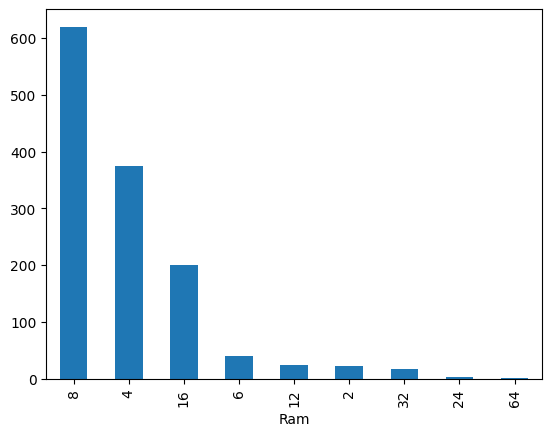

In [9]:
df['Ram'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='Ram', ylabel='Price'>

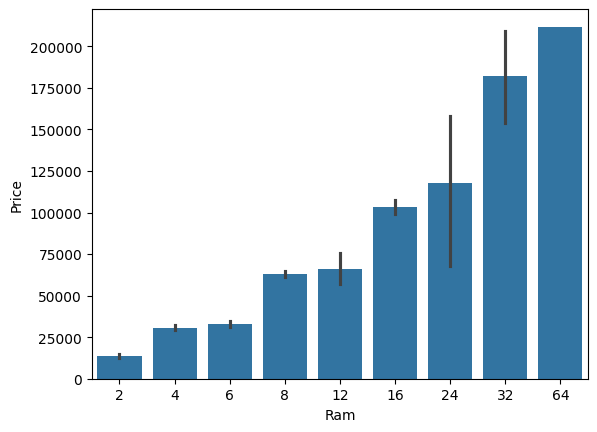

In [10]:
import seaborn as sns
sns.barplot(x=df['Ram'],y=df['Price'])
#plt.xticks(rotation = 'vertical');

In [11]:
df['Weight'].value_counts()

Weight
2.20    126
2.10     58
2.00     45
2.40     44
2.30     41
       ... 
4.50      1
1.14      1
3.80      1
3.25      1
2.34      1
Name: count, Length: 171, dtype: int64

C:\Users\agarw\AppData\Local\Temp\ipykernel_5028\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<AxesSubplot: xlabel='Weight', ylabel='Density'>

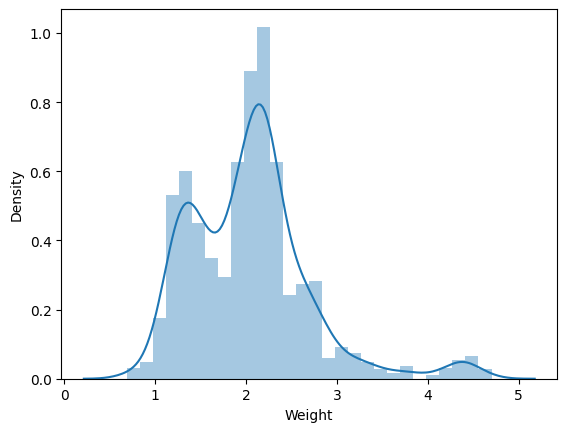

In [12]:
sns.distplot(df['Weight'])

C:\Users\agarw\AppData\Local\Temp\ipykernel_5028\3704116898.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])   #Plots the distribution of 'price' data     #Clearly laptoips with less price are most common


<AxesSubplot: xlabel='Price', ylabel='Density'>

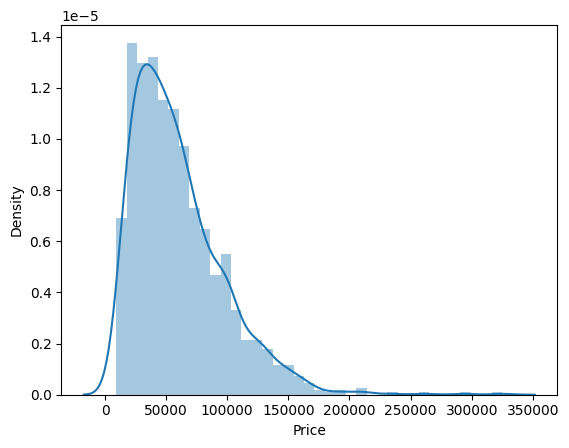

In [13]:
#Seaborn distplot lets you show a histogram with a line on it.
#We use seaborn in combination with matplotlib
import seaborn as sns
sns.distplot(df['Price'])   #Plots the distribution of 'price' data     #Clearly laptoips with less price are most common

## Let us now see how Company ,TypeName and OpSys effects Price

<AxesSubplot: xlabel='Company'>

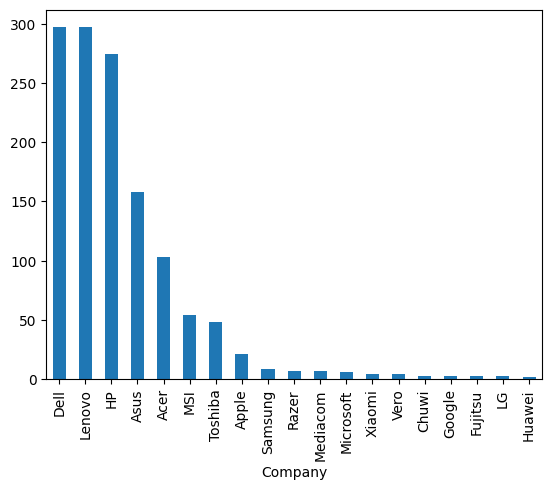

In [14]:
df['Company'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='TypeName'>

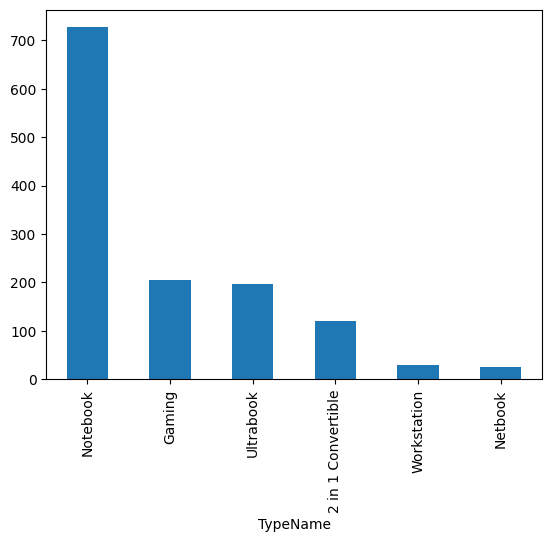

In [15]:
df['TypeName'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='OpSys'>

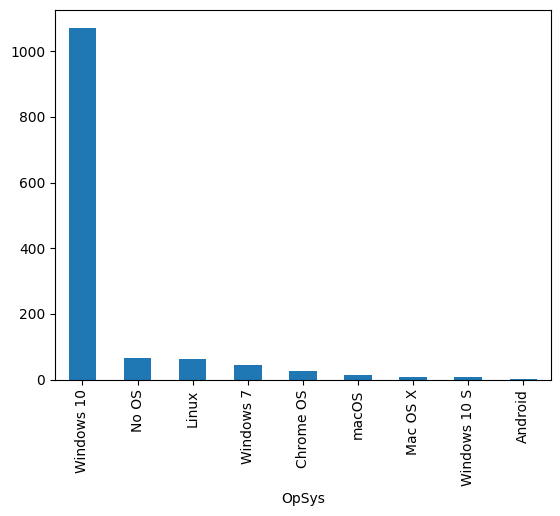

In [16]:
df['OpSys'].value_counts().plot(kind='bar')    #Clearly Windows10 OpSys is the highest selling

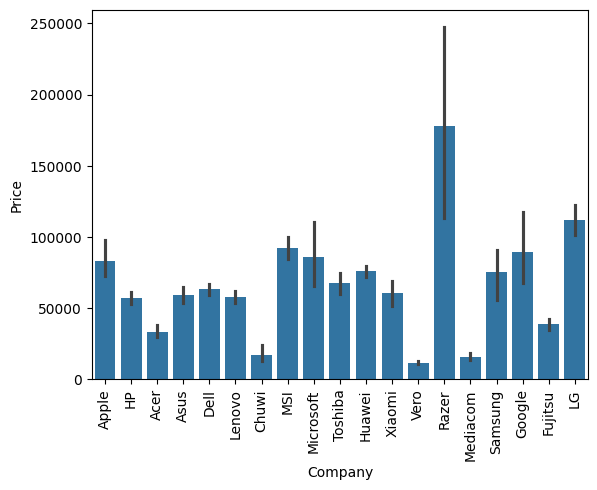

In [17]:
#let see what is the avg price range for laptops of different comapnies


#A barplot is basically used to aggregate the categorical data according to some methods and by default it’s the mean. It can also be understood as a visualization of the group by action. To use this plot we choose a categorical column for the x-axis and a numerical column for the y-axis, and we see that it creates a plot taking a mean per categorical column.

sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation = 'vertical');

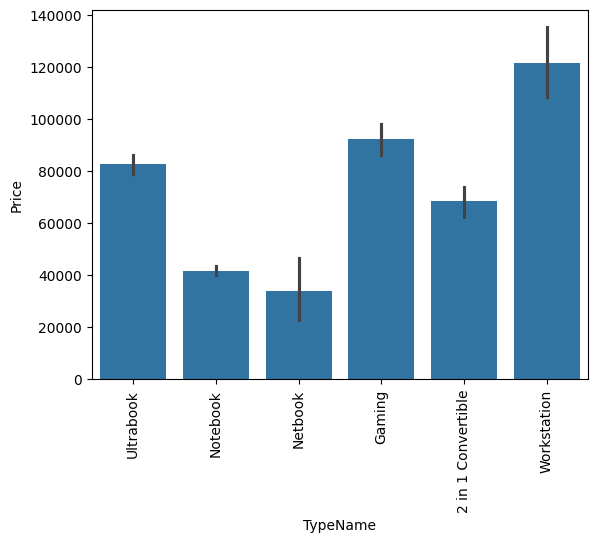

In [18]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation = 'vertical');

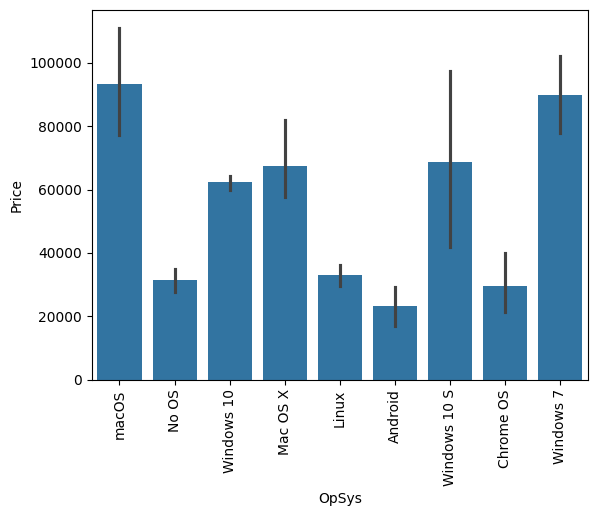

In [19]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation = 'vertical');

In [20]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [21]:
df['os'] = df['OpSys'].apply(cat_os)

In [22]:
df.drop('OpSys',axis = 'columns')

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,os
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,Mac
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,Mac
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,Others/No OS/Linux
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,1.83,135195.3360,Mac
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,Mac
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,1.80,33992.6400,Windows
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,1.30,79866.7200,Windows
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,1.50,12201.1200,Windows
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,2.19,40705.9200,Windows


## Let's now go through Inches column

<AxesSubplot: xlabel='Inches'>

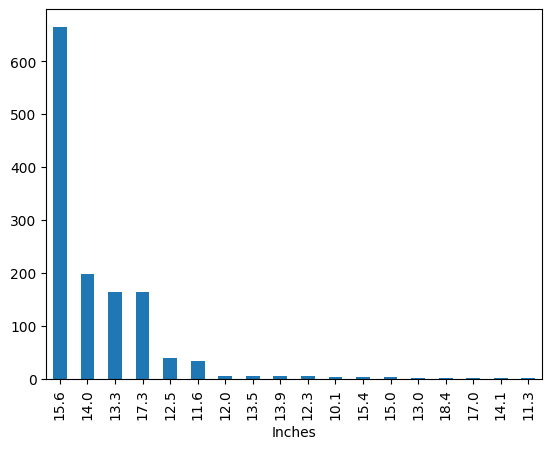

In [23]:
df['Inches'].value_counts().plot(kind='bar')  

C:\Users\agarw\AppData\Local\Temp\ipykernel_5028\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<AxesSubplot: xlabel='Inches', ylabel='Density'>

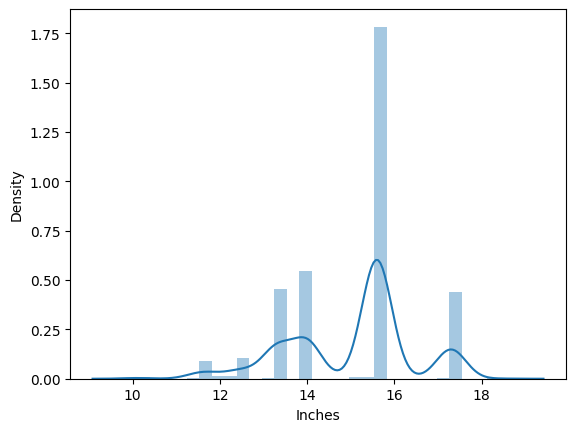

In [24]:
sns.distplot(df['Inches'])

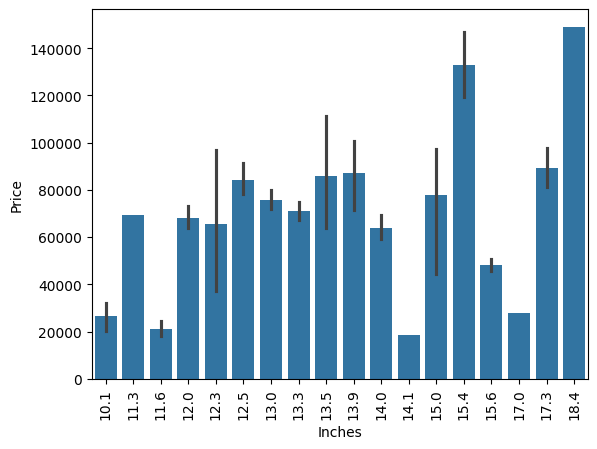

In [25]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation = 'vertical');

## Now let us work on CPU

In [26]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [27]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [28]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df['Cpu Name']

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1298         Intel Core i7
1299         Intel Core i7
1300    Intel Celeron Dual
1301         Intel Core i7
1302    Intel Celeron Dual
Name: Cpu Name, Length: 1303, dtype: object

In [29]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

<AxesSubplot: xlabel='Cpu brand'>

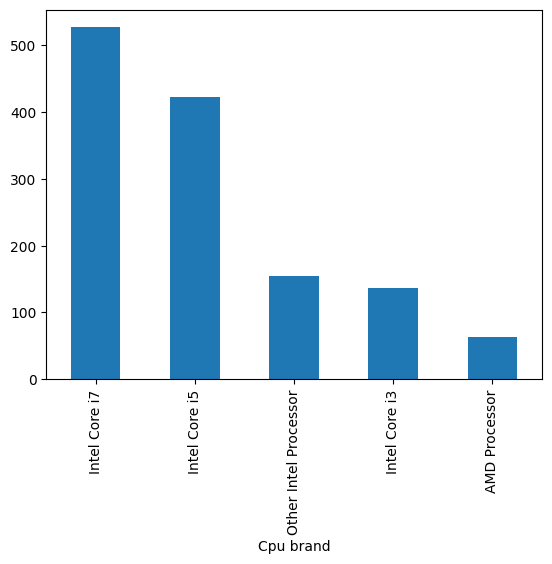

In [30]:
df['Cpu brand'].value_counts().plot(kind ='bar')

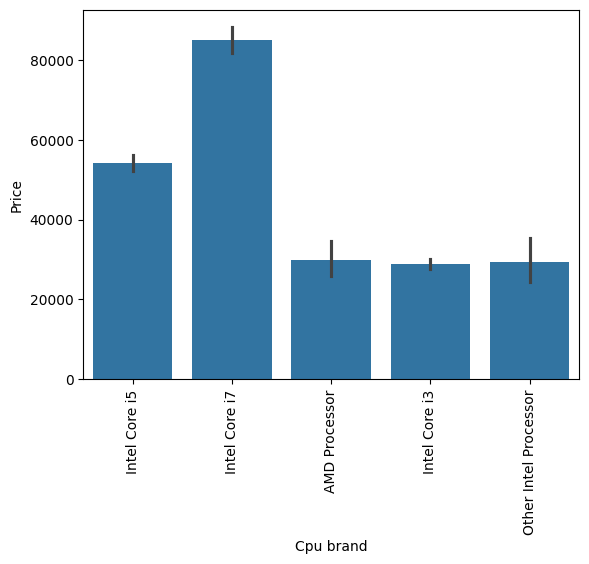

In [31]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation = 'vertical');

In [32]:
import re
df['ProcessorSpeed'] = df['Cpu'].apply(lambda x: re.findall(r'\d+\.\d+?', x))

In [33]:
# Function to convert list values to float
def convert_to_float(lst):
    return float(lst[0]) if lst else None

In [34]:
df['ProcessorSpeed'] = df['ProcessorSpeed'].apply(convert_to_float)

In [35]:
df = df.drop(['Cpu','Cpu Name'],axis = 'columns')

## Now let us work on GPU

In [36]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [37]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
            

In [38]:
import re
df['GpuModel'] = df['Gpu'].apply(lambda x: re.findall(r'\d+', x))

In [39]:
df['GpuModel']

0          [640]
1         [6000]
2          [620]
3          [455]
4          [650]
          ...   
1298       [520]
1299       [520]
1300          []
1301    [5, 330]
1302          []
Name: GpuModel, Length: 1303, dtype: object

In [40]:
df['GpuModel'] = df['GpuModel'].apply(convert_to_float)

In [41]:
df = df.drop('Gpu',axis = 'columns')

In [42]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,OpSys,Weight,Price,os,Cpu brand,ProcessorSpeed,Gpu brand,GpuModel
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128GB SSD,macOS,1.37,71378.6832,Mac,Intel Core i5,2.3,Intel,640.0
1,Apple,Ultrabook,13.3,1440x900,8,128GB Flash Storage,macOS,1.34,47895.5232,Mac,Intel Core i5,1.8,Intel,6000.0
2,HP,Notebook,15.6,Full HD 1920x1080,8,256GB SSD,No OS,1.86,30636.0000,Others/No OS/Linux,Intel Core i5,2.5,Intel,620.0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512GB SSD,macOS,1.83,135195.3360,Mac,Intel Core i7,2.7,AMD,455.0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256GB SSD,macOS,1.37,96095.8080,Mac,Intel Core i5,3.1,Intel,650.0


## Now let us work on Memory

In [43]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [44]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '', regex=True)

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df = df.drop(['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage','Memory'],axis='columns')


In [45]:
df

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,os,Cpu brand,ProcessorSpeed,Gpu brand,GpuModel,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,Mac,Intel Core i5,2.3,Intel,640.0,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,47895.5232,Mac,Intel Core i5,1.8,Intel,6000.0,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,30636.0000,Others/No OS/Linux,Intel Core i5,2.5,Intel,620.0,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,Mac,Intel Core i7,2.7,AMD,455.0,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,Mac,Intel Core i5,3.1,Intel,650.0,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4,Windows 10,1.80,33992.6400,Windows,Intel Core i7,2.5,Intel,520.0,0,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,Windows 10,1.30,79866.7200,Windows,Intel Core i7,2.5,Intel,520.0,0,512,0,0
1300,Lenovo,Notebook,14.0,1366x768,2,Windows 10,1.50,12201.1200,Windows,Other Intel Processor,1.6,Intel,NaN,0,0,0,64
1301,HP,Notebook,15.6,1366x768,6,Windows 10,2.19,40705.9200,Windows,Intel Core i7,2.5,AMD,5.0,1000,0,0,0


## Now let us work on Screen Resolution

In [46]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [47]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<AxesSubplot: xlabel='TouchScreen', ylabel='Price'>

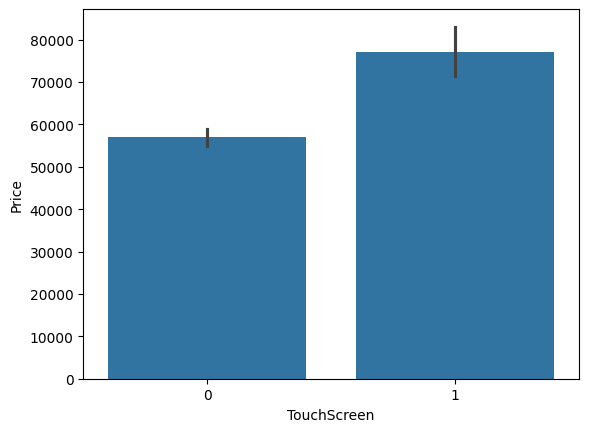

In [48]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

In [49]:
df['IPSPanel'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

<AxesSubplot: xlabel='IPSPanel', ylabel='Price'>

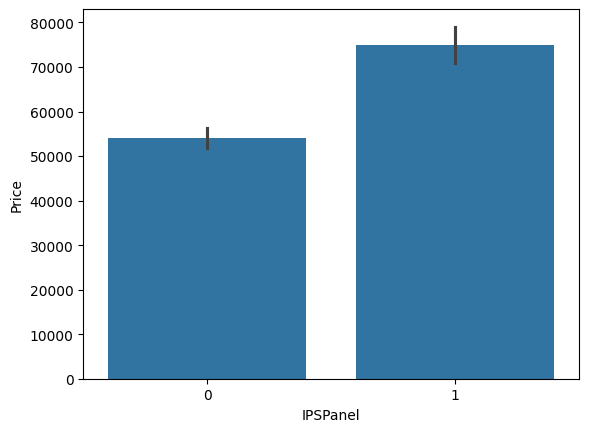

In [50]:
sns.barplot(x=df['IPSPanel'],y=df['Price'])

In [51]:
#To get x and y resolution from screen res , if we split it at 'x' sign , we will get our y resolution
new = df['ScreenResolution'].str.split('x',expand=True)

In [52]:
df['Y_res'] = new[1]

In [53]:
new[0]

0               IPS Panel Retina Display 2560
1                                        1440
2                                Full HD 1920
3               IPS Panel Retina Display 2880
4               IPS Panel Retina Display 2560
                        ...                  
1298     IPS Panel Full HD / Touchscreen 1920
1299    IPS Panel Quad HD+ / Touchscreen 3200
1300                                     1366
1301                                     1366
1302                                     1366
Name: 0, Length: 1303, dtype: object

In [54]:
import re
df['X_res'] = new[0].apply(lambda x: re.findall(r'\d+', x)).apply(lambda x:x[0])

In [55]:
df['X_res']

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_res, Length: 1303, dtype: object

In [56]:
df['X_res']=df['X_res'].astype('int')
df['Y_res']=df['Y_res'].astype('int')

In [57]:
df = df.drop('ScreenResolution',axis='columns')

In [58]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,os,Cpu brand,ProcessorSpeed,Gpu brand,GpuModel,HDD,SSD,Hybrid,Flash_Storage,TouchScreen,IPSPanel,Y_res,X_res
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,Mac,Intel Core i5,2.3,Intel,640.0,0,128,0,0,0,1,1600,2560
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,Mac,Intel Core i5,1.8,Intel,6000.0,0,0,0,128,0,0,900,1440
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,Others/No OS/Linux,Intel Core i5,2.5,Intel,620.0,0,256,0,0,0,0,1080,1920
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,Mac,Intel Core i7,2.7,AMD,455.0,0,512,0,0,0,1,1800,2880
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,Mac,Intel Core i5,3.1,Intel,650.0,0,256,0,0,0,1,1600,2560


In [59]:
#Let us make a new column pixels per inches
df['PPI']= ((df['X_res']**2)+(df['Y_res'])**2)**0.5/df['Inches']

In [61]:
# df.corr()['Price']

In [62]:
df = df.drop(['Inches','X_res','Y_res'],axis = 'columns')

In [63]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,os,Cpu brand,ProcessorSpeed,Gpu brand,GpuModel,HDD,SSD,Hybrid,Flash_Storage,TouchScreen,IPSPanel,PPI
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,Mac,Intel Core i5,2.3,Intel,640.0,0,128,0,0,0,1,226.983005
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,Mac,Intel Core i5,1.8,Intel,6000.0,0,0,0,128,0,0,127.677940
2,HP,Notebook,8,No OS,1.86,30636.0000,Others/No OS/Linux,Intel Core i5,2.5,Intel,620.0,0,256,0,0,0,0,141.211998
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,Mac,Intel Core i7,2.7,AMD,455.0,0,512,0,0,0,1,220.534624
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,Mac,Intel Core i5,3.1,Intel,650.0,0,256,0,0,0,1,226.983005


In [65]:
import seaborn as sns
# sns.heatmap(df.corr())

In [66]:
# df.corr()['Price']

## Working on our target column 'Price'

C:\Users\agarw\AppData\Local\Temp\ipykernel_5028\90185157.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))    #Coz our Price column was skewed we apllied log on it


<AxesSubplot: xlabel='Price', ylabel='Density'>

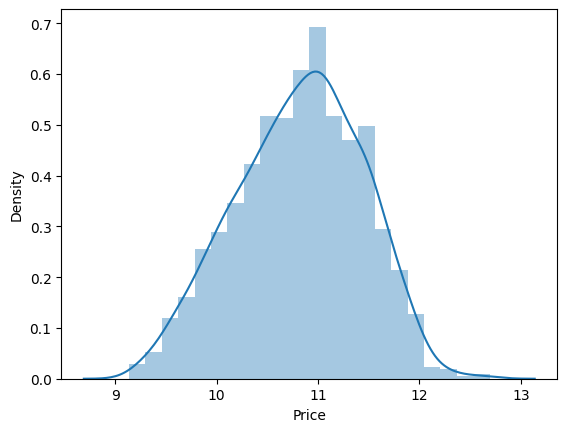

In [67]:
sns.distplot(np.log(df['Price']))    #Coz our Price column was skewed we apllied log on it

In [68]:
df = df.dropna(how ='any')
df.isnull().sum()

Company           0
TypeName          0
Ram               0
OpSys             0
Weight            0
Price             0
os                0
Cpu brand         0
ProcessorSpeed    0
Gpu brand         0
GpuModel          0
HDD               0
SSD               0
Hybrid            0
Flash_Storage     0
TouchScreen       0
IPSPanel          0
PPI               0
dtype: int64

## Working on Model

In [69]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=0)

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [73]:
# Define the ColumnTransformer for one-hot encoding
col_tnf = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder( drop='first'), [0, 1, 3, 5, 6, 8])
], remainder='passthrough')


# Apply the transformation to X_train and X_test
X_train_transformed = col_tnf.fit_transform(X_train)


import pickle
# Save col_tnf to a file
with open('col_tnf.pkl', 'wb') as file:
    pickle.dump(col_tnf, file)

X_test_transformed = col_tnf.transform(X_test)


# Create and fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred = regression_model.predict(X_test_transformed)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print('R2 score:', r2)
print('MAE:', mae)


R2 score: 0.8586122705067516
MAE: 0.1779632860868575


In [74]:
Coefficients = regression_model.coef_
coef_list = Coefficients.tolist()    
Intercept = regression_model.intercept_

In [75]:
import json
with open('Coefficients.json', "w") as file:
    json.dump(coef_list, file)

In [76]:
with open('Intercept.json','w') as file:
    json.dump(Intercept,file)

## Visualize


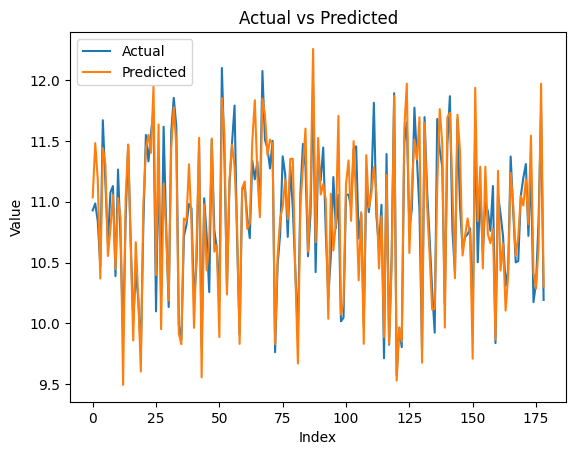

In [77]:
y_test = np.array(y_test)
plt.plot(y_pred,label = 'Actual')
plt.plot(y_test,label = 'Predicted')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend(loc='best')